<a href="https://colab.research.google.com/github/jimmy-pink/colab-playground/blob/main/coursera/cv-transpose_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使用反卷积技术扩展图像

<a href="https://www.coursera.org/learn/building-deep-learning-models-with-tensorflow/ungradedLti/ZrJL5/lab-practical-application-of-transpose-convolution" target="_parent" style="display: flex; align-items: center; height: 100%;"><img src="https://raw.githubusercontent.com/jimmy-pink/colab-playground/refs/heads/main/resources/icon/coursera.svg" alt="Open In Coursera" style="height: 100%; object-fit: contain;"><span style="height: 100%; display: flex; align-items: center; padding-left: 10px;">Lab: Practical Application of Transpose Convolution</span></a>

In [2]:
!pip install tensorflow

!pip install matplotlib
import tensorflow as tf

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D

import numpy as np

import matplotlib.pyplot as plt

### 问题分析
使用Transpose Convolution 反卷积技术，将fashion mnist数据集中的28*28图像重构。

一个简单的卷积自编码器（Convolutional Autoencoder）。   
学习输入数据的有效表示（即编码），然后使用该表示来重构原始输入。  


✅ 潜在用途：
- 图像去噪（如果加入噪声训练）
- 特征学习（如配合分类器）
- 数据压缩/降维实验
- 异常检测（通过重构误差判断异常）

### 数据准备

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
# 载入 Fashion MNIST 数据集，数据是 28x28 的灰度图，共 10 个类别
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# 归1化（normalization），将像素值从 [0, 255] 变为 [0, 1]，有助于模型训练。
training_images=training_images / 255.0
test_images=test_images / 255.0

training_images = training_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

### 建模训练

In [5]:
# 输入层
input_layer = Input(shape=(28, 28, 1))

conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)

transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer)
model = Model(inputs=input_layer, outputs=transpose_conv_layer)
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
history = model.fit(training_images, training_images,  # Use resized images as targets
                   epochs=5,
                   batch_size=32,
                   validation_data=(test_images, test_images))  # Use resized images as validation targets

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - loss: 0.0227 - val_loss: 8.8208e-04
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - loss: 7.7527e-04 - val_loss: 6.1044e-04
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 5.8486e-04 - val_loss: 5.2430e-04
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - loss: 5.1902e-04 - val_loss: 4.8792e-04
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - loss: 4.7016e-04 - val_loss: 4.5581e-04


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


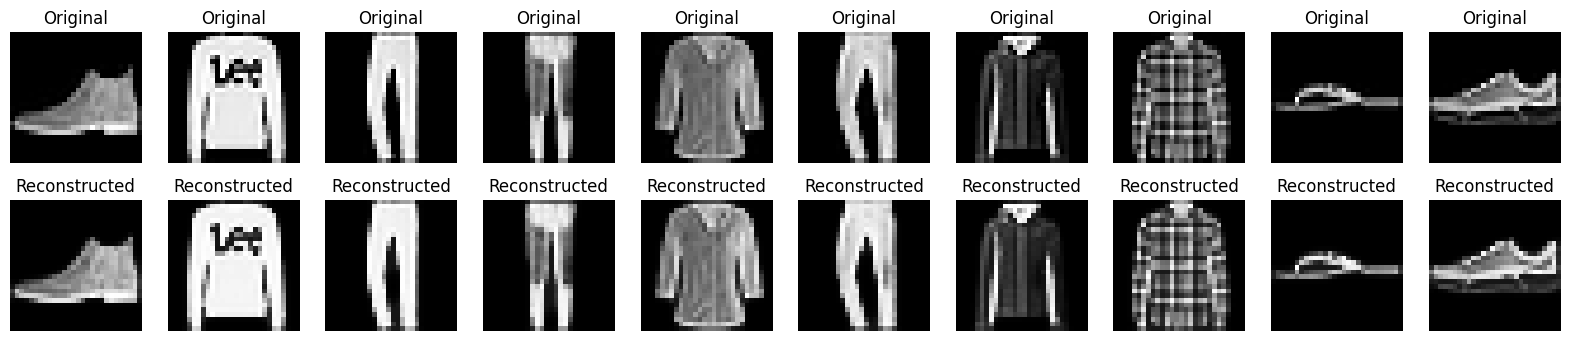

In [9]:
# Predict on test data
y_pred = model.predict(test_images)

# Plot some sample images

n = 10 # Number of samples to display

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_pred[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()